In [1]:
#multiple linear regression model
#first we import the library and  load the data  

import pandas as pd
data=pd.read_csv('Fish.csv')
data.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [2]:
# we have 159 sample and 7 features and there is no missing values 
print(data.shape)
print(data.info())
print(data.describe())

(159, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
Species    159 non-null object
Weight     159 non-null float64
Length1    159 non-null float64
Length2    159 non-null float64
Length3    159 non-null float64
Height     159 non-null float64
Width      159 non-null float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB
None
            Weight     Length1     Length2     Length3      Height       Width
count   159.000000  159.000000  159.000000  159.000000  159.000000  159.000000
mean    398.326415   26.247170   28.415723   31.227044    8.970994    4.417486
std     357.978317    9.996441   10.716328   11.610246    4.286208    1.685804
min       0.000000    7.500000    8.400000    8.800000    1.728400    1.047600
25%     120.000000   19.050000   21.000000   23.150000    5.944800    3.385650
50%     273.000000   25.200000   27.300000   29.400000    7.786000    4.248500
75%     650.000000   32.700000   35.500000   39.650000

In [3]:
#the data is ready to apply the model now we select more then one independent features to create the model
# Import the feature selection module from sklearn
# This module allows us to select the most appopriate features for our regression
from sklearn.feature_selection import f_regression


In [4]:
#independent variables: 'Length1' and 'Height'
a= data[['Length1','Height','Length2','Length3','Width']]

#  depended variable: 'Weight'
b = data['Weight']


In [16]:
# There are two output arrays
# we only need The second one that contains the p-values of these F-statistics 
p_values=f_regression(a,b)[1]
p_values

array([4.74961972e-64, 3.84234184e-27, 3.39511323e-65, 5.02319145e-67,
       2.03819464e-54])

In [27]:
p_values.round()

array([0., 0., 0., 0., 0.])

In [18]:
#since all variables p_value is less then 0.05 , we can select them  as independent variables
#we will need the regression model
from sklearn.linear_model import LinearRegression

In [19]:
# creating a linear regression object
reg = LinearRegression()

#  fitting the regression
reg.fit(a,b)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [26]:
#Creating a summary table with the Coefficients and p-values
# Let's create a new data frame with the names of the features
reg_summary = pd.DataFrame(data = a.columns.values, columns=['Features'])
# Then we create and fill a second column, called 'Coefficients' with the coefficients of the regression
reg_summary ['Coefficients'] = reg.coef_
# Finally, we add the p-values we just calculated
reg_summary ['p-values'] = p_values.round()

reg_summary

,Features,Coefficients,p-values
0,Length1,62.355214,0.0
1,Height,28.297351,0.0
2,Length2,-6.526752,0.0
3,Length3,-29.026219,0.0
4,Width,22.473307,0.0


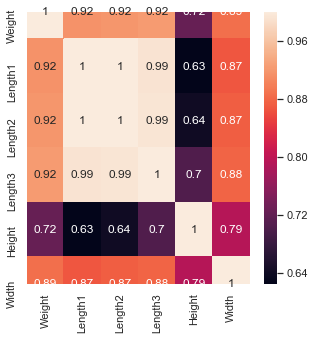

In [31]:

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

plt.figure(figsize=(5,5))
sns.heatmap(data.corr(), annot=True)
plt.show()